In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install SimpleITK
!pip install connected-components-3d

     |████████████████████████████████| 42.5MB 72kB/s 
     |████████████████████████████████| 952kB 26.5MB/s 


In [3]:
%cd /content/drive/My Drive/Luan Van 2019/Tumor/model/src

/content/drive/My Drive/Luan Van 2019/Tumor/model/src


In [4]:
%cd util
%ls

/content/drive/My Drive/Luan Van 2019/Tumor/model/src/util
 1511663_generate_data.ipynb
 2_kiet1107_generate_data.ipynb
 3_5551_generate_data.ipynb
 3_kiet1107_generate_data.ipynb
 a2_1107_generate_data.ipynb
 a2_5551_generate_data.ipynb
 a3_1107_generate_data.ipynb
 Analysis_data2.ipynb
 Analysis_data.ipynb
'Bản sao của kiet1107_generate_data.ipynb'
'Bản sao của tranbu_generate_data.ipynb'
 butran_generate_data.ipynb
 data2.py
 data.py
 display.py
 evaluate_model_tools.py
 kiet5551_generate_data.ipynb
 metrics.py
 npy_generator.py
 predict.ipynb
 __pycache__/
 test_2_kiet1107_generate_data.ipynb


In [0]:
import os
from pathlib import Path
from natsort import natsorted
import sys
sys.path.append('/content/drive/My Drive/Luan Van 2019/Tumor/model/src')
from util.data import *
import glob
import natsort
import cc3d
import numpy as np

**Show image**

In [0]:
def show(img,gt,index):
  plt.imshow(img[:,:,index],cmap="gray")
  plt.show()
  plt.imshow(gt[:,:,index],cmap="gray")
  plt.show()

#1. Nomalize, Resample space 

In [0]:
imgpath=(glob.glob('/content/drive/My Drive/LITS Challenge/Training Batch 1/volu*') 
        + glob.glob('/content/drive/My Drive/LITS Challenge/Training Batch 2/volu*'))
maskpath=(glob.glob('/content/drive/My Drive/LITS Challenge/Training Batch 1/seg*') 
        +glob.glob('/content/drive/My Drive/LITS Challenge/Training Batch 2/seg*'))
#imgpath.sort()
#maskpath.sort()
imgpath=natsort.natsorted(imgpath)
maskpath=natsort.natsorted(maskpath)
print(imgpath)
print(maskpath)
if len(maskpath) != len(imgpath) or imgpath[100] != imgpath[100]:
  print('error')

['/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-0.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-1.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-2.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-3.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-4.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-5.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-6.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-7.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-8.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-9.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-10.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-11.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-12.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/vol


## 1.1 Test 1 sample

In [0]:
preprocess_offline([imgpath[10]],[maskpath[10]],save_dir='/content/drive/My Drive/Dataset2/',resample_spacing=(1,1,1),verbose=True)

In [0]:
image_1 = sitk.ReadImage("/content/drive/My Drive/Dataset2/resample_data/volume-011.nii.gz")
img_arr_1= sitk.GetArrayFromImage(image_1)
image_1 = np.moveaxis(img_arr_1, 0, -1)

mask_1=sitk.ReadImage("/content/drive/My Drive/Dataset2/resample_data/segmentation-011.nii.gz")
mask_arr_1=sitk.GetArrayFromImage(mask_1)
mask_1 = np.moveaxis(mask_arr_1, 0, -1)

img_origin=sitk.ReadImage(imgpath[10])
mask_arr_2=sitk.GetArrayFromImage(img_origin)
img_origin = np.moveaxis(mask_arr_2, 0, -1)

In [0]:
print(image_1.shape)
print(mask_1.shape)
print(mask_1.max())
print(img_origin.shape)

(394, 394, 501)
(394, 394, 501)
1
(512, 512, 501)


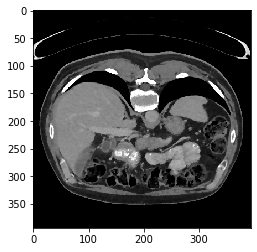

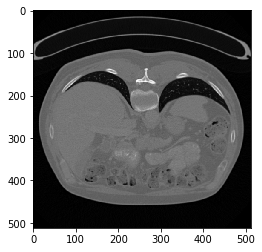

In [0]:
show(image_1,img_origin,400)

In [0]:
image_1 = sitk.ReadImage("/content/drive/My Drive/Dataset2/volume-001.nii.gz")
img_arr_1= sitk.GetArrayFromImage(image_1)
image_1 = np.moveaxis(img_arr_1, 0, -1)

mask_1=sitk.ReadImage("/content/drive/My Drive/Dataset2/segmentation-001.nii.gz")
mask_arr_1=sitk.GetArrayFromImage(mask_1)
mask_1 = np.moveaxis(mask_arr_1, 0, -1)

img_origin=sitk.ReadImage(imgpath[10])
mask_arr_2=sitk.GetArrayFromImage(img_origin)
img_origin = np.moveaxis(mask_arr_2, 0, -1)

print(image_1.shape)
print(mask_1.shape)
print(mask_1.max())
print(img_origin.shape)


(394, 394, 501)
(394, 394, 501)
1
(512, 512, 501)


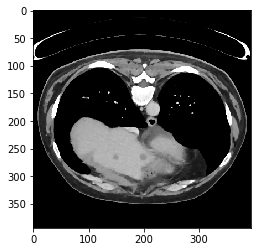

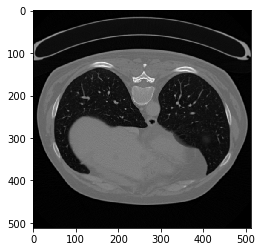

In [0]:
show(image_1,img_origin,463)

In [0]:
image_2 = sitk.ReadImage("/content/drive/My Drive/Dataset2/volume-001.nii.gz")
img_arr_1= sitk.GetArrayFromImage(image_2)
image_2 = np.moveaxis(img_arr_1, 0, -1)

mask_2=sitk.ReadImage("/content/drive/My Drive/Dataset2/segmentation-001.nii.gz")
mask_arr_1=sitk.GetArrayFromImage(mask_2)
mask_2 = np.moveaxis(mask_arr_1, 0, -1)

img_origin=sitk.ReadImage(imgpath[1])
mask_arr_2=sitk.GetArrayFromImage(img_origin)
img_origin = np.moveaxis(mask_arr_2, 0, -1)

print(image_1.shape)
print(mask_1.shape)
print(mask_1.max())
print(img_origin.shape)


## 1.2 Create

In [0]:
#kiet1107
#image 1-20
preprocess_offline(imgpath[:21],maskpath[0:21],save_dir='/content/drive/My Drive/Dataset2/resample_data',resample_spacing=(1,1,1),verbose=True)

In [0]:
#kiet5551
#image 21-40
preprocess_offline(imgpath[:40],maskpath[:40],save_dir='/content/drive/My Drive/Dataset2/resample_data',offset=20,resample_spacing=(1,1,1),verbose=True)

In [0]:
#tranbu
#image 41-60
preprocess_offline(imgpath[:60],maskpath[:60],save_dir='/content/drive/My Drive/Dataset2/resample_data',offset=40,resample_spacing=(1,1,1),verbose=True)

In [0]:
#Kiet1107_2
#image 61-80
preprocess_offline(imgpath[:80],maskpath[:80],save_dir='/content/drive/My Drive/Dataset2/resample_data',offset=60,resample_spacing=(1,1,1),verbose=True)

In [0]:
#Kiet1107_3
#image 81-100
#81-85
preprocess_offline(imgpath[:85],maskpath[:85],save_dir='/content/drive/My Drive/Dataset2/resample_data',offset=80,resample_spacing=(1,1,1),verbose=True)

Sample Scan: /content/drive/My Drive/LITS Challenge/Training Batch 2/volume-80.nii
Sample Ground Truth : /content/drive/My Drive/LITS Challenge/Training Batch 2/volume-80.nii
Set label for tumor successful...
Loading scan :  1.9785883109999816  s
Sample shape:  (217, 512, 512)
Sample spacing:  (0.68359375, 0.68359375, 2.0)
Resample : 55.127613319000034  s
Sample new shape:  (434, 350, 350)
Sample new spacing:  (1.0, 1.0, 1.0)
Normalize : 0.18808398100003387  s
Anisotropic Diffusion Filter : 194.892501584  s
Preprocess : 250.53374147899996  s
Save file:  /content/drive/My Drive/Dataset2/resample_data/volume-081.nii.gz
Save file:  /content/drive/My Drive/Dataset2/resample_data/segmentation-081.nii.gz
Sample Scan: /content/drive/My Drive/LITS Challenge/Training Batch 2/volume-81.nii
Sample Ground Truth : /content/drive/My Drive/LITS Challenge/Training Batch 2/volume-81.nii
Set label for tumor successful...
Loading scan :  16.55100508099997  s
Sample shape:  (343, 512, 512)
Sample spacing:

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Resample : 71.0606207489999  s
Sample new shape:  (429, 360, 360)
Sample new spacing:  (1.0, 1.0, 0.9994172494172494)
Normalize : 0.22470490199998494  s
Anisotropic Diffusion Filter : 205.42841508899994  s
Preprocess : 277.14794066699994  s
Save file:  /content/drive/My Drive/Dataset2/resample_data/volume-082.nii.gz
Save file:  /content/drive/My Drive/Dataset2/resample_data/segmentation-082.nii.gz
Sample Scan: /content/drive/My Drive/LITS Challenge/Training Batch 2/volume-82.nii
Sample Ground Truth : /content/drive/My Drive/LITS Challenge/Training Batch 2/volume-82.nii
Set label for tumor successful...
Loading scan :  22.456927758999996  s
Sample shape:  (519, 512, 512)
Sample spacing:  (0.625, 0.625, 0.8009999990463257)
Resample : 66.06457150899996  s
Sample new shape:  (416, 320, 320)
Sample new spacing:  (1.0, 1.0, 0.9993245180409688)
Normalize : 0.21329411399995024  s
Anisotropic Diffusion Filter : 161.000642407  s
Preprocess : 227.71830177699997  s
Save file:  /content/drive/My Dr

In [0]:
#Kiet5551_2
#image 101-120
preprocess_offline(imgpath[:120],maskpath[:120],save_dir='/content/drive/My Drive/Dataset2/resample_data',offset=100,resample_spacing=(1,1,1),verbose=True)

In [0]:
#Kiet5551_3
#image 121-131
preprocess_offline(imgpath,maskpath,save_dir='/content/drive/My Drive/Dataset2/resample_data',offset=120,resample_spacing=(1,1,1),verbose=True)

# 2. Augmentation data

In [7]:
save_dir1='/content/drive/My Drive/Dataset2/data/data_balanced/train'
save_dir2='/content/drive/My Drive/Dataset2/data/data_balanced/valid'

all_img_path=glob.glob('/content/drive/My Drive/Dataset2/resample_data/volu*')
all_mask_path=glob.glob('/content/drive/My Drive/Dataset2/resample_data/seg*')
all_img_path=natsort.natsorted(all_img_path)
all_mask_path=natsort.natsorted(all_mask_path)
print(all_img_path)
print(all_mask_path)

['/content/drive/My Drive/Dataset2/resample_data/volume-001.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-002.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-003.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-004.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-005.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-006.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-007.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-008.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-009.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-010.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-011.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-012.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-013.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-014.nii.gz', '/content/drive/My Drive/Dataset2/resample_data

In [8]:
img_train_path=all_img_path[:105]
mask_train_path=all_mask_path[:105]
img_validation_path=all_img_path[105:]
mask_validation_path=all_mask_path[105:]
print(img_train_path)
print(mask_train_path)
print(img_validation_path)

['/content/drive/My Drive/Dataset2/resample_data/volume-001.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-002.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-003.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-004.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-005.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-006.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-007.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-008.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-009.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-010.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-011.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-012.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-013.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-014.nii.gz', '/content/drive/My Drive/Dataset2/resample_data

In [0]:
img_train_path.sort()
mask_train_path.sort()
img_validation_path.sort()
mask_validation_path.sort()

In [0]:
datasets_train= [img_train_path,mask_train_path]
datasets_validation= [img_validation_path,mask_validation_path]

In [0]:
data_augment=[all_img_path,all_mask_path]

In [0]:
def random_crop_with_mask_custom(image, mask, target_size,choosing_size_tumor=None):
    '''
    random crop
    :param image: input image
    :param mask: input image
    :param target_size: output size
    :return: croped image
    '''
    if image.shape[0] > target_size[0]:
        dim_0_offset = target_size[0]
        sample_dim_0 = np.random.randint(40, image.shape[0] - 2*target_size[0])
    else:
        dim_0_offset = image.shape[0]
        sample_dim_0 = 0
    if image.shape[1] > target_size[1]:
        dim_1_offset = target_size[1]
        sample_dim_1 = np.random.randint(40, image.shape[1] - 2*target_size[1])
    else:
        dim_1_offset = image.shape[1]
        sample_dim_1 = 0
    if image.shape[2] > target_size[2]:
        dim_2_offset = target_size[2]
        sample_dim_2 = np.random.randint(0, image.shape[2] - target_size[2])
    else:
        dim_2_offset = image.shape[2]
        sample_dim_2 = 0

    labels_out = cc3d.connected_components(mask)
    list_tumor= np.unique(labels_out)[1:]
    print("lablel of all tumor: ",list_tumor)
    if len(list_tumor)!= 0 :
      maxidx=maxidx=[]
      while True:
        random_tumor = np.random.randint(1, len(list_tumor)+1)
        tumor_index=np.where(labels_out== random_tumor)
        maxidx = np.max(tumor_index,axis=1)
        minidx = np.min(tumor_index,axis=1)
        volume=(maxidx[0]-minidx[0])*(maxidx[1]-minidx[1])*(maxidx[2]-minidx[2])

        if choosing_size_tumor== "small" and volume <= 16*16*16:
          print("choosing tumor : ",random_tumor)
          break
        if choosing_size_tumor== "medium" and volume <= 64*64*64 and volume>= 16*16*16:
          print("choosing tumor : ",random_tumor)
          break
        if choosing_size_tumor== "big" and volume>= 64*64*64:
          print("choosing tumor : ",random_tumor)
          break
        if choosing_size_tumor=="all":
          if volume >= 64*64*64:
            print("choosing tumor : ",random_tumor)
            break
          if volume <= 64*64*64 and volume>= 16*16*16 and random.uniform(0, 1) > 0.8:
            print("choosing tumor : ",random_tumor)
            break
          if volume<= 16*16*16 and random.uniform(0, 1) > 0.9:
            print("choosing tumor : ",random_tumor)
            break
        '''
        if choosing_size_tumor== "a":
          if (volume> 1 or random.uniform(0, 1) < 0.01) :
            print("choosing tumor : ",random_tumor)
            break'''
        #if choosing_size_tumor== "b":
          #if (volume> 16*16*16 and volume <64*64*64) or random.uniform(0, 1) < 0.01 :
            #print("choosing tumor : ",random_tumor)
            #break
      
      
      x= np.random.randint(minidx[0],maxidx[0]+1)
      y= np.random.randint(minidx[1],maxidx[1]+1)
      z= np.random.randint(minidx[2],maxidx[2]+1)
      x=x - target_size[0]//2 + np.random.randint(-10,10)
      y=y - target_size[1]//2 + np.random.randint(-10,10)
      z=z - target_size[2]//2 + np.random.randint(-10,10)
      if x>=0 and y>=0 and z>=0:
        sample_dim_0=x
        sample_dim_1=y
        sample_dim_2=z
    print("x,y,z :",sample_dim_0,dim_0_offset,sample_dim_1,dim_1_offset,sample_dim_2,dim_2_offset)
    #x,y,z :            320           64          204          64           98            32
    rt_image = image[sample_dim_0:(sample_dim_0 + dim_0_offset), sample_dim_1:(sample_dim_1 + dim_1_offset),
               sample_dim_2:(sample_dim_2 + dim_2_offset)]
    rt_mask = mask[sample_dim_0:(sample_dim_0 + dim_0_offset), sample_dim_1:(sample_dim_1 + dim_1_offset),
              sample_dim_2:(sample_dim_2 + dim_2_offset)]
    # zero padding if need
    rt_image = np.pad(rt_image, pad_width=(
        (0, target_size[0] - rt_mask.shape[0]), (0, target_size[1] - rt_mask.shape[1]), (0, target_size[2] - rt_mask.shape[2])),
                      mode='constant', constant_values=0)
    rt_mask = np.pad(rt_mask, pad_width=(
        (0, target_size[0] - rt_mask.shape[0]), (0, target_size[1] - rt_mask.shape[1]), (0, target_size[2] - rt_mask.shape[2])),
                     mode='constant', constant_values=0)

    return rt_image, rt_mask

In [0]:
def find_list_tumor(list_patient,list_tumor_group,index):
  list_tumor=[]
  for i in range(len(list_patient)):
    if list_patient[i]==str(index):
      list_tumor.append(list_tumor_group[i])
  return list_tumor

In [0]:
def data_augmentation(data_sets,save_dir, part_number ,n_sample, sample_per_scan,only_crop_tumor=None,
                      crop_size=(192, 192, 64), elastic_prob = 0.0, rotate_prob = 0.8 ,max_rotate_angle_x = 0.0,
                      max_rotate_angle_y = 0.0, max_rotate_angle_z = 0.0, print_log = False):
  
    total_time = time.monotonic()
    total = n_sample * sample_per_scan
    avg_time = 0
    print("data  generate 8...")
    scans = np.ndarray((total, crop_size[0], crop_size[1], crop_size[2]), dtype=np.float32)
    gts = np.ndarray((total, crop_size[0], crop_size[1], crop_size[2]), dtype=np.uint8)

    import csv
    list_patient=[]
    # a: small tumor, b: midle tumor, c: big tumor
    list_tumor_group=[]
    # load infor about tumor
    with open('/content/drive/My Drive/Luan Van 2019/Tumor/log/infor_tumor2.csv', 'r') as csvFile:
      reader = csv.reader(csvFile)
      for row in reader:
        list_patient.append(row[0])
        list_tumor_group.append(row[8])
      csvFile.close()
    list_patient=list_patient[1:]
    list_tumor_group=list_tumor_group[1:]

    for i in range(0,n_sample):
        t = time.monotonic()
        # data set select
        data_set = data_sets
        assert len(data_set)==2, 'Missing data, must have scan and ground truth in each dataset'
        scan_set = data_set[0]
        gt_set = data_set[1]
        assert len(scan_set)==len(gt_set), 'Missing data in scan set or ground truth set'
        # scan select
        while True:
          index = random.randint(0, len(scan_set)-1)
          if str(index +1) in list_patient:
            list_tumor=find_list_tumor(list_patient,list_tumor_group,str(index+1))
            if only_crop_tumor=="small" and 'a' in list_tumor:
              break
            if only_crop_tumor=="medium" and 'b' in list_tumor:
              break
            if only_crop_tumor=="big" and 'c' in list_tumor:
              break
            if only_crop_tumor=="all":
              if 'c' in list_tumor:
                break
              if 'b' in list_tumor and random.uniform(0, 1) > 0.7:
                break
              if 'a' in list_tumor and random.uniform(0,1) >0.8:
                break

        scan_path = scan_set[index]
        gt_path = gt_set[index]
        scan_itk = sitk.ReadImage(scan_path)
        gt_itk = sitk.ReadImage(gt_path)
        # Convert to array
        scan_arr = sitk.GetArrayFromImage(scan_itk)
        gt_arr = sitk.GetArrayFromImage(gt_itk)
        #move axis from (z,x,y) -> (x,y,z)
        scan_arr = np.moveaxis(scan_arr,0,-1)
        gt_arr = np.moveaxis(gt_arr,0,-1)
        print('Scan shape: ', scan_arr.shape)

        if print_log:
            print('Selected scan: ',scan_path)
            print('Selected gt: ',gt_path)
            print('Load scan and ground truth: ',time.monotonic()-t,' s')
            t = time.monotonic()
        for j in range(0,sample_per_scan):
            sample_time_init = time.monotonic()
            #make a copy
            scan_aug = np.array(scan_arr,dtype = 'float32')
            gt_aug = gt_arr

            scan_aug, gt_aug = random_crop_with_mask_custom(scan_aug, gt_aug, crop_size,choosing_size_tumor=only_crop_tumor)

            gt_aug = np.array(gt_aug,dtype = 'float32')

            print(gt_aug.shape," :shape after crop")

            #Random rotation x y
            if random.uniform(0, 1) < rotate_prob and max_rotate_angle_x > 0.:
                rotate_angle = random.uniform(-max_rotate_angle_x, max_rotate_angle_x)
                scan_aug = scipy.ndimage.interpolation.rotate(scan_aug,rotate_angle,(1,2),reshape = False,mode = 'nearest')
                gt_aug = scipy.ndimage.interpolation.rotate(gt_aug,rotate_angle,(1,2),reshape = False,mode = 'nearest')
                if print_log:
                    print('Random rotation x: ',time.monotonic()-t,' s')
                    t = time.monotonic()
            if random.uniform(0, 1) < rotate_prob and max_rotate_angle_y > 0.:
                rotate_angle = random.uniform(-max_rotate_angle_y, max_rotate_angle_y)
                scan_aug = scipy.ndimage.interpolation.rotate(scan_aug,rotate_angle,(0,2),reshape = False,mode = 'nearest')
                gt_aug = scipy.ndimage.interpolation.rotate(gt_aug,rotate_angle,(0,2),reshape = False,mode = 'nearest')
                if print_log:
                    print('Random rotation y: ',time.monotonic()-t,' s')
                    t = time.monotonic()
                print(gt_aug.shape," :shape rotate x,y")
            #Random rotation z
            if random.uniform(0, 1) < rotate_prob and max_rotate_angle_z > 0.:
                rotate_angle = random.uniform(-max_rotate_angle_z, max_rotate_angle_z)
                scan_aug = scipy.ndimage.interpolation.rotate(scan_aug,rotate_angle,(0,1),reshape = True,mode = 'nearest')
                gt_aug = scipy.ndimage.interpolation.rotate(gt_aug,rotate_angle,(0,1),reshape = True,mode = 'nearest')
                if print_log:
                    print('Random rotation z: ',time.monotonic()-t,' s')
                    t = time.monotonic()
                print(gt_aug.shape," :shape rotate z")
            # Elastic Transform
            if random.uniform(0, 1) < elastic_prob:
                merge_volume = np.concatenate((scan_aug, gt_aug), axis=2)
                alpha_factor = 2
                sigma_factor = 0.08
                alpha_affine_factor = 0.08
                if print_log: 
                    print('Elastic Transform Prepare: ',time.monotonic()-t,' s')
                    t = time.monotonic()
                merge_result = elastic_transform_v2(image = merge_volume, alpha = merge_volume.shape[1] * alpha_factor, sigma = merge_volume.shape[1] * sigma_factor, alpha_affine = merge_volume.shape[1] * alpha_affine_factor)
                scan_aug = merge_result[...,:scan_aug.shape[2]]
                gt_aug = merge_result[...,-gt_aug.shape[2]:]
                if print_log: 
                    print('Elastic Transform Perform: ',time.monotonic()-t,' s')
                    t = time.monotonic()

                print(gt_aug.shape," :shape elastic")

            # Add to save array
            save_index = i*sample_per_scan+j
            scan_aug[scan_aug<0.] = 0.
            scan_aug[scan_aug>1.] = 1.
            gt_aug[gt_aug>=0.5] = 1
            gt_aug[gt_aug<0.5] = 0
            #gt_aug=gt_aug.astype(np.int32)
            
            scan_aug = scan_aug[0:(crop_size[0] if scan_aug.shape[0]>= crop_size[0] else scan_aug.shape[0]) 
                                      ,0:(crop_size[1] if scan_aug.shape[1]>= crop_size[1] else scan_aug.shape[1])
                                      ,0:(crop_size[2] if scan_aug.shape[2]>= crop_size[2] else scan_aug.shape[2])]
            gt_aug = gt_aug[0:(crop_size[0] if scan_aug.shape[0]>= crop_size[0] else scan_aug.shape[0]) 
                                      ,0:(crop_size[1] if scan_aug.shape[1]>= crop_size[1] else scan_aug.shape[1])
                                      ,0:(crop_size[2] if scan_aug.shape[2]>= crop_size[2] else scan_aug.shape[2])]

            print(gt_aug.shape," :shape before padding")
            
            if scan_aug.shape[0]<=crop_size[0] or scan_aug.shape[1]<=crop_size[1] or scan_aug.shape[2]<=crop_size[2]:
              scan_aug = np.pad(scan_aug, pad_width=((0,crop_size[0]-scan_aug.shape[0]), (0, crop_size[1]-scan_aug.shape[1]),
                                                              (0, crop_size[2]-scan_aug.shape[2])),
                     mode='constant', constant_values=0)
              gt_aug = np.pad(gt_aug, pad_width=((0,crop_size[0]-scan_aug.shape[0]), (0, crop_size[1]-scan_aug.shape[1]),
                                                              (0, crop_size[2]-scan_aug.shape[2])),
                     mode='constant', constant_values=0)
              
            print(gt_aug.shape," :shape final")
              
            scans[save_index] = scan_aug
            gts[save_index] = gt_aug
            
            sample_process_time = time.monotonic()-sample_time_init
            print('Sample generate time: ',sample_process_time,' s')
            sample_left = total-save_index-1
            avg_time =((avg_time*save_index)+sample_process_time)/(save_index+1)
            time_left = avg_time*sample_left
            print('Elapsed time: ',time.strftime('%H:%M:%S', time.gmtime(time.monotonic()-total_time)))
            print('Estimate Remaining time: ',time.strftime('%H:%M:%S', time.gmtime(time_left)))
            print('-------------------------------------------Finish: ', save_index+1, '/ ', total,'-------------------------------------------')
    scan_file = os.path.join(save_dir,'scan-n'+str(total).zfill(4)+'-s'+str(crop_size[0])+'_'+str(crop_size[1])+'_'+str(crop_size[2])+'.part'+str(part_number).zfill(3)+'.npy')
    gt_file = os.path.join(save_dir,'gt-n'+str(total).zfill(4)+'-s'+str(crop_size[0])+'_'+str(crop_size[1])+'_'+str(crop_size[2])+'.part'+str(part_number).zfill(3)+'.npy')
    print('Saving scan: ',scan_file)
    np.save(scan_file, scans)
    print('Saving ground truth: ',gt_file)
    np.save(gt_file, gts)
    print('Done!!!')

In [15]:
#kiet1107_2
# data valid 1-30
for i in range(51,61):
  data_augmentation(datasets_train,save_dir=save_dir1, part_number=i ,n_sample=8, sample_per_scan=30, crop_size=(64, 64, 64),
                    elastic_prob = 0.3, rotate_prob = 0.7 ,max_rotate_angle_x = 10,max_rotate_angle_y = 10, max_rotate_angle_z = 10,print_log=True,only_crop_tumor='all')

data  generate 8...
Scan shape:  (360, 360, 429)
Selected scan:  /content/drive/My Drive/Dataset2/resample_data/volume-082.nii.gz
Selected gt:  /content/drive/My Drive/Dataset2/resample_data/segmentation-082.nii.gz
Load scan and ground truth:  7.420709819999985  s
lablel of all tumor:  [1]
choosing tumor :  1
x,y,z : 152 64 225 64 279 64
(64, 64, 64)  :shape after crop
Random rotation x:  1.875054634999998  s
Random rotation y:  0.07294211199999268  s
(64, 64, 64)  :shape rotate x,y
Random rotation z:  0.08130046700000548  s
(64, 64, 64)  :shape rotate z
Elastic Transform Prepare:  0.0006311239999945428  s
Elastic Transform Perform:  0.15431413999999677  s
(64, 64, 64)  :shape elastic
(64, 64, 64)  :shape before padding
(64, 64, 64)  :shape final
Sample generate time:  2.189988489000001  s
Elapsed time:  00:00:10
Estimate Remaining time:  00:08:43
-------------------------------------------Finish:  1 /  240 -------------------------------------------
lablel of all tumor:  [1]
choosing 

# Drapt

In [0]:
def random_crop_with_mask_custom(image, mask, target_size,choosing_size_tumor=None):
    '''
    random crop
    :param image: input image
    :param mask: input image
    :param target_size: output size
    :return: croped image
    '''
    if image.shape[0] > target_size[0]:
        dim_0_offset = target_size[0]
        sample_dim_0 = np.random.randint(40, image.shape[0] - 2*target_size[0])
    else:
        dim_0_offset = image.shape[0]
        sample_dim_0 = 0
    if image.shape[1] > target_size[1]:
        dim_1_offset = target_size[1]
        sample_dim_1 = np.random.randint(40, image.shape[1] - 2*target_size[1])
    else:
        dim_1_offset = image.shape[1]
        sample_dim_1 = 0
    if image.shape[2] > target_size[2]:
        dim_2_offset = target_size[2]
        sample_dim_2 = np.random.randint(0, image.shape[2] - target_size[2])
    else:
        dim_2_offset = image.shape[2]
        sample_dim_2 = 0

    labels_out = cc3d.connected_components(mask)
    list_tumor= np.unique(labels_out)[1:]
    print("lablel of all tumor: ",list_tumor)
    if len(list_tumor)!= 0 and random.uniform(0, 1) > 0.5:
      maxidx=maxidx=[]
      while True:
        random_tumor = np.random.randint(1, len(list_tumor)+1)
        tumor_index=np.where(labels_out== random_tumor)
        maxidx = np.max(tumor_index,axis=1)
        minidx = np.min(tumor_index,axis=1)
        volume=(maxidx[0]-minidx[0])*(maxidx[1]-minidx[1])*(maxidx[2]-minidx[2])

        if choosing_size_tumor== "a":
          print("choosing tumor : ",random_tumor)
          break
        '''
        if choosing_size_tumor== "a":
          if (volume> 1 or random.uniform(0, 1) < 0.01) :
            print("choosing tumor : ",random_tumor)
            break'''
        #if choosing_size_tumor== "b":
          #if (volume> 16*16*16 and volume <64*64*64) or random.uniform(0, 1) < 0.01 :
            #print("choosing tumor : ",random_tumor)
            #break
      
      
      x= np.random.randint(minidx[0],maxidx[0]+1)
      y= np.random.randint(minidx[1],maxidx[1]+1)
      z= np.random.randint(minidx[2],maxidx[2]+1)
      x=x - target_size[0]//2 + np.random.randint(-10,10)
      y=y - target_size[1]//2 + np.random.randint(-10,10)
      z=z - target_size[2]//2 + np.random.randint(-10,10)
      if x>=0 and y>=0 and z>=0:
        sample_dim_0=x
        sample_dim_1=y
        sample_dim_2=z
    print("x,y,z :",sample_dim_0,dim_0_offset,sample_dim_1,dim_1_offset,sample_dim_2,dim_2_offset)
    #x,y,z :            320           64          204          64           98            32
    rt_image = image[sample_dim_0:(sample_dim_0 + dim_0_offset), sample_dim_1:(sample_dim_1 + dim_1_offset),
               sample_dim_2:(sample_dim_2 + dim_2_offset)]
    rt_mask = mask[sample_dim_0:(sample_dim_0 + dim_0_offset), sample_dim_1:(sample_dim_1 + dim_1_offset),
              sample_dim_2:(sample_dim_2 + dim_2_offset)]
    # zero padding if need
    rt_image = np.pad(rt_image, pad_width=(
        (0, target_size[0] - rt_mask.shape[0]), (0, target_size[1] - rt_mask.shape[1]), (0, target_size[2] - rt_mask.shape[2])),
                      mode='constant', constant_values=0)
    rt_mask = np.pad(rt_mask, pad_width=(
        (0, target_size[0] - rt_mask.shape[0]), (0, target_size[1] - rt_mask.shape[1]), (0, target_size[2] - rt_mask.shape[2])),
                     mode='constant', constant_values=0)

    return rt_image, rt_mask

In [0]:
def data_augmentation(data_sets,datasets_rate,save_dir, part_number ,n_sample, sample_per_scan,
                      crop_size=(192, 192, 64), elastic_prob = 0.0, rotate_prob = 0.8 ,max_rotate_angle_x = 0.0,
                      max_rotate_angle_y = 0.0, max_rotate_angle_z = 0.0, print_log = False, choosing_size_tumor=None):
    assert len(data_sets)==len(datasets_rate), 'Missing data set selecting rate'
    total_time = time.monotonic()
    total = n_sample * sample_per_scan
    avg_time = 0
    print("data  generate 8...")
    scans = np.ndarray((total, crop_size[0], crop_size[1], crop_size[2]), dtype=np.float32)
    gts = np.ndarray((total, crop_size[0], crop_size[1], crop_size[2]), dtype=np.uint8)
    for i in range(0,n_sample):
        t = time.monotonic()
        # data set select
        data_set = data_sets[select_number(datasets_rate)]
        assert len(data_set)==2, 'Missing data, must have scan and ground truth in each dataset'
        scan_set = data_set[0]
        gt_set = data_set[1]
        assert len(scan_set)==len(gt_set), 'Missing data in scan set or ground truth set'
        # scan select
        index = random.randint(0, len(scan_set)-1)
        scan_path = scan_set[index]
        gt_path = gt_set[index]
        scan_itk = sitk.ReadImage(scan_path)
        gt_itk = sitk.ReadImage(gt_path)
        # Convert to array
        scan_arr = sitk.GetArrayFromImage(scan_itk)
        gt_arr = sitk.GetArrayFromImage(gt_itk)
        #move axis from (z,x,y) -> (x,y,z)
        scan_arr = np.moveaxis(scan_arr,0,-1)
        gt_arr = np.moveaxis(gt_arr,0,-1)
        print('Scan shape: ', scan_arr.shape)

        if print_log:
            print('Selected scan: ',scan_path)
            print('Selected gt: ',gt_path)
            print('Load scan and ground truth: ',time.monotonic()-t,' s')
            t = time.monotonic()
        for j in range(0,sample_per_scan):
            sample_time_init = time.monotonic()
            #make a copy
            scan_aug = np.array(scan_arr,dtype = 'float32')
            gt_aug = gt_arr

            scan_aug, gt_aug = random_crop_with_mask_custom(scan_aug, gt_aug, crop_size,choosing_size_tumor)

            gt_aug = np.array(gt_aug,dtype = 'float32')

            print(gt_aug.shape," :shape after crop")

            #Random rotation x y
            if random.uniform(0, 1) < rotate_prob and max_rotate_angle_x > 0.:
                rotate_angle = random.uniform(-max_rotate_angle_x, max_rotate_angle_x)
                scan_aug = scipy.ndimage.interpolation.rotate(scan_aug,rotate_angle,(1,2),reshape = False,mode = 'nearest')
                gt_aug = scipy.ndimage.interpolation.rotate(gt_aug,rotate_angle,(1,2),reshape = False,mode = 'nearest')
                if print_log:
                    print('Random rotation x: ',time.monotonic()-t,' s')
                    t = time.monotonic()
            if random.uniform(0, 1) < rotate_prob and max_rotate_angle_y > 0.:
                rotate_angle = random.uniform(-max_rotate_angle_y, max_rotate_angle_y)
                scan_aug = scipy.ndimage.interpolation.rotate(scan_aug,rotate_angle,(0,2),reshape = False,mode = 'nearest')
                gt_aug = scipy.ndimage.interpolation.rotate(gt_aug,rotate_angle,(0,2),reshape = False,mode = 'nearest')
                if print_log:
                    print('Random rotation y: ',time.monotonic()-t,' s')
                    t = time.monotonic()
                print(gt_aug.shape," :shape rotate x,y")
            #Random rotation z
            if random.uniform(0, 1) < rotate_prob and max_rotate_angle_z > 0.:
                rotate_angle = random.uniform(-max_rotate_angle_z, max_rotate_angle_z)
                scan_aug = scipy.ndimage.interpolation.rotate(scan_aug,rotate_angle,(0,1),reshape = True,mode = 'nearest')
                gt_aug = scipy.ndimage.interpolation.rotate(gt_aug,rotate_angle,(0,1),reshape = True,mode = 'nearest')
                if print_log:
                    print('Random rotation z: ',time.monotonic()-t,' s')
                    t = time.monotonic()
                print(gt_aug.shape," :shape rotate z")
            # Elastic Transform
            if random.uniform(0, 1) < elastic_prob:
                merge_volume = np.concatenate((scan_aug, gt_aug), axis=2)
                alpha_factor = 2
                sigma_factor = 0.08
                alpha_affine_factor = 0.08
                if print_log: 
                    print('Elastic Transform Prepare: ',time.monotonic()-t,' s')
                    t = time.monotonic()
                merge_result = elastic_transform_v2(image = merge_volume, alpha = merge_volume.shape[1] * alpha_factor, sigma = merge_volume.shape[1] * sigma_factor, alpha_affine = merge_volume.shape[1] * alpha_affine_factor)
                scan_aug = merge_result[...,:scan_aug.shape[2]]
                gt_aug = merge_result[...,-gt_aug.shape[2]:]
                if print_log: 
                    print('Elastic Transform Perform: ',time.monotonic()-t,' s')
                    t = time.monotonic()

                print(gt_aug.shape," :shape elastic")

            # Add to save array
            save_index = i*sample_per_scan+j
            scan_aug[scan_aug<0.] = 0.
            scan_aug[scan_aug>1.] = 1.
            gt_aug[gt_aug>=0.5] = 1
            gt_aug[gt_aug<0.5] = 0
            #gt_aug=gt_aug.astype(np.int32)
            
            scan_aug = scan_aug[0:(crop_size[0] if scan_aug.shape[0]>= crop_size[0] else scan_aug.shape[0]) 
                                      ,0:(crop_size[1] if scan_aug.shape[1]>= crop_size[1] else scan_aug.shape[1])
                                      ,0:(crop_size[2] if scan_aug.shape[2]>= crop_size[2] else scan_aug.shape[2])]
            gt_aug = gt_aug[0:(crop_size[0] if scan_aug.shape[0]>= crop_size[0] else scan_aug.shape[0]) 
                                      ,0:(crop_size[1] if scan_aug.shape[1]>= crop_size[1] else scan_aug.shape[1])
                                      ,0:(crop_size[2] if scan_aug.shape[2]>= crop_size[2] else scan_aug.shape[2])]

            print(gt_aug.shape," :shape before padding")
            
            if scan_aug.shape[0]<=crop_size[0] or scan_aug.shape[1]<=crop_size[1] or scan_aug.shape[2]<=crop_size[2]:
              scan_aug = np.pad(scan_aug, pad_width=((0,crop_size[0]-scan_aug.shape[0]), (0, crop_size[1]-scan_aug.shape[1]),
                                                              (0, crop_size[2]-scan_aug.shape[2])),
                     mode='constant', constant_values=0)
              gt_aug = np.pad(gt_aug, pad_width=((0,crop_size[0]-scan_aug.shape[0]), (0, crop_size[1]-scan_aug.shape[1]),
                                                              (0, crop_size[2]-scan_aug.shape[2])),
                     mode='constant', constant_values=0)
              
            print(gt_aug.shape," :shape final")
              
            scans[save_index] = scan_aug
            gts[save_index] = gt_aug
            
            sample_process_time = time.monotonic()-sample_time_init
            print('Sample generate time: ',sample_process_time,' s')
            sample_left = total-save_index-1
            avg_time =((avg_time*save_index)+sample_process_time)/(save_index+1)
            time_left = avg_time*sample_left
            print('Elapsed time: ',time.strftime('%H:%M:%S', time.gmtime(time.monotonic()-total_time)))
            print('Estimate Remaining time: ',time.strftime('%H:%M:%S', time.gmtime(time_left)))
            print('-------------------------------------------Finish: ', save_index+1, '/ ', total,'-------------------------------------------')
    scan_file = os.path.join(save_dir,'scan-n'+str(total).zfill(4)+'-s'+str(crop_size[0])+'_'+str(crop_size[1])+'_'+str(crop_size[2])+'.part'+str(part_number).zfill(3)+'.npy')
    gt_file = os.path.join(save_dir,'gt-n'+str(total).zfill(4)+'-s'+str(crop_size[0])+'_'+str(crop_size[1])+'_'+str(crop_size[2])+'.part'+str(part_number).zfill(3)+'.npy')
    print('Saving scan: ',scan_file)
    np.save(scan_file, scans)
    print('Saving ground truth: ',gt_file)
    np.save(gt_file, gts)
    print('Done!!!')